In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import dateutil.relativedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.3.2


In [6]:
# inspector = inspect(engine)
# inspector.get_table_names()

In [7]:
# inspector.get_columns('measurement')

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [47]:
# first = session.query(Measurement).first()
# first.__dict__

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
most_recent_date, station_id = session.query(Measurement.date, Measurement.station). \
order_by(Measurement.date.desc()).first()
f'Most recent data is on: {most_recent_date}, for station id: {station_id}'

'Most recent data is on: 2017-08-23, for station id: USC00519397'

In [11]:
most_recent_date

'2017-08-23'

In [12]:
# Get the 12 months preceeding the most recent date
d = dt.datetime.strptime(most_recent_date, "%Y-%m-%d")
d_minus_12m = d - dateutil.relativedelta.relativedelta(months=12) 
d_minus_12m

datetime.datetime(2016, 8, 23, 0, 0)

In [38]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
begin_date = dt.date(2016, 8, 23)
sel = [Measurement.date,Measurement.prcp]
station_data = session.query(*sel).filter(Measurement.date >= dt.date(2016, 8, 23)).all()

In [39]:
df = pd.DataFrame(station_data)

In [40]:
df.dtypes

date     object
prcp    float64
dtype: object

In [42]:
df.head(3)

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08


In [43]:
#df.head(5)
df['date'] = pd.to_datetime(df['date'])
df.head(3)

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08


In [44]:
df2 = df.set_index(df['date'])

In [46]:
df2.head(3)

,date,prcp
date,,
2016-08-23,2016-08-23,0.00
2016-08-24,2016-08-24,0.08
2016-08-25,2016-08-25,0.08


In [48]:
df3 = df2.resample('M')["prcp"].mean()

In [52]:
pd.DataFrame(df3)

,prcp
date,
2016-08-31,0.392642
2016-09-30,0.285549
2016-10-31,0.121620
2016-11-30,0.120234
2016-12-31,0.199494
2017-01-31,0.070294
2017-02-28,0.241111
2017-03-31,0.175266
2017-04-30,0.321111


In [54]:
# Save to Dataframe
df = pd.DataFrame(station_data)
# df = df.set_index(df['date'])
# df.head(4)

# 1. question here. why does set_index give this error?? 

In [16]:
df = df.set_index('date')

<AxesSubplot:xlabel='date'>

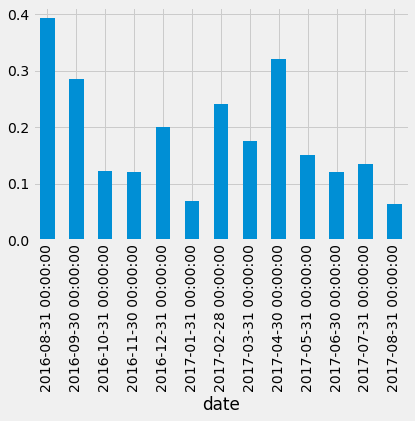

In [53]:
df3.plot(kind='bar')


In [ ]:
df = df.sort_index(ascending=False)
df.plot.bar()
plt.show()

In [26]:
df2.groupby(pd.TimeGrouper(freq='M')).mean()

AttributeError: module 'pandas' has no attribute 'TimeGrouper'

In [27]:
df5 = pd.DataFrame({'Date': pd.to_datetime(['2017-10-05', '2017-10-20', '2017-10-01', '2017-09-01']),
                   'Values': [5, 10, 15, 20]})


In [55]:
df.head(3)

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08


In [28]:
df5

,Date,Values
0,2017-10-05,5
1,2017-10-20,10
2,2017-10-01,15
3,2017-09-01,20


In [ ]:
# normalize day to beginning of month, 4 alternative methods below
df['YearMonth'] = df['Date'] + pd.offsets.MonthEnd(-1) + pd.offsets.Day(1)
df['YearMonth'] = df['Date'] - pd.to_timedelta(df['Date'].dt.day-1, unit='D')
df['YearMonth'] = df['Date'].map(lambda dt: dt.replace(day=1))
df['YearMonth'] = df['Date'].dt.normalize().map(pd.tseries.offsets.MonthBegin().rollback)


In [23]:
pd.date_range(start, end, freq="BM")

NameError: name 'start' is not defined

In [30]:
df5['YearMonth'] = df5['Date'] + pd.offsets.MonthEnd(-1) + pd.offsets.Day(1)

In [31]:
df5

,Date,Values,YearMonth
0,2017-10-05,5,2017-10-01
1,2017-10-20,10,2017-10-01
2,2017-10-01,15,2017-10-01
3,2017-09-01,20,2017-09-01


In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data




In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()